In [2]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter


matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

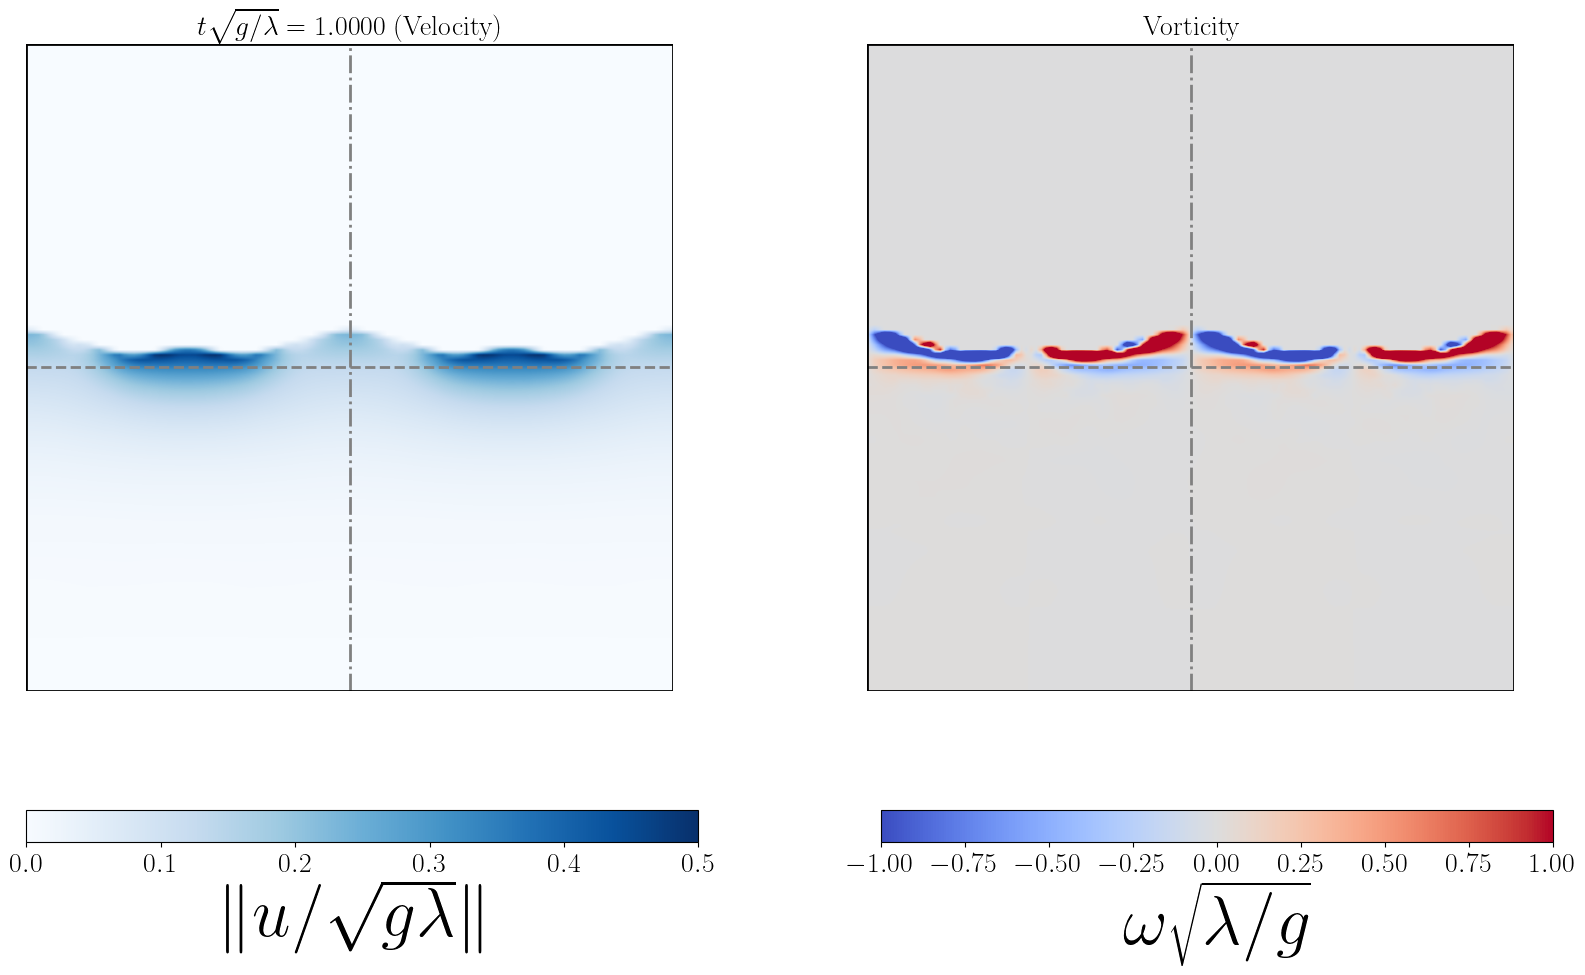

In [3]:
fileName = "testData"

t = 1.0

data = np.load(f"testData/{int(t*1000):08d}_data.npz")
X = data['X']
Y = data['Y']
f = data['f_rot']
vel = data['vel_rot']
omega = data['omega_rot']
ux = data['ux_rot']
uy = data['uy_rot']


lw =2 
x_extent = [-1, 1]
y_extent = [-1, 1]

# For imshow, extent is [x_min, x_max, y_min, y_max].
extent_vel   = [x_extent[0], x_extent[1], y_extent[0], y_extent[1]]
extent_omega = [x_extent[0], x_extent[1], y_extent[0], y_extent[1]]

AxesLabel, TickLabel = 50, 20
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19.20, 10.80))

# Draw the rotated interface in green, domain boundaries, etc.
for ax in [ax1, ax2]:
    # Gray dashed lines now get swapped similarly if you want
    # them at z=0 or r=0.  If you simply want a bounding box,
    # note that x->z, y->r:
    ax.plot([x_extent[0], x_extent[1]], [0, 0], '--', color='grey', linewidth=lw)  # "horizontal" axis is z
    ax.plot([0, 0], [y_extent[0], y_extent[1]], '-.', color='grey', linewidth=lw)  # "vertical" axis is r

    # Domain box:
    ax.plot([x_extent[0], x_extent[1]], [y_extent[0], y_extent[0]], '-', color='black', linewidth=lw)
    ax.plot([x_extent[0], x_extent[1]], [y_extent[1], y_extent[1]], '-', color='black', linewidth=lw)
    ax.plot([x_extent[0], x_extent[0]], [y_extent[0], y_extent[1]], '-', color='black', linewidth=lw)
    ax.plot([x_extent[1], x_extent[1]], [y_extent[0], y_extent[1]], '-', color='black', linewidth=lw)

# ----------------------------------------------------------
# 5) Now show imshow with the rotated arrays and extents:
# ----------------------------------------------------------
cntrl1 = ax1.imshow(
    vel, 
    cmap="Blues", 
    interpolation='bilinear', 
    origin='lower', 
    extent=extent_vel,
    vmin=0.0,
    vmax=0.5
)
cntrl2 = ax2.imshow(
    omega,  
    cmap="coolwarm", 
    interpolation='bilinear', 
    origin='lower', 
    extent=extent_omega,
    vmin=-1e0,
    vmax=1e0
)

# Equal aspect ensures squares in the new orientation
for ax in [ax1, ax2]:
    ax.set_aspect('equal')
    ax.set_xlim(x_extent[0], x_extent[1])  # x range
    ax.set_ylim(y_extent[0], y_extent[1])  # y range

# Titles and labels that match the new orientation
ax1.set_title(fr'$t\sqrt{{g/\lambda}} = {t:.4f}$ (Velocity)', fontsize=TickLabel)
# ax1.set_xlabel('$X$', fontsize=AxesLabel)
# ax1.set_ylabel('$r$', fontsize=AxesLabel)

ax2.set_title(r'Vorticity', fontsize=TickLabel)
# ax2.set_xlabel('$z$', fontsize=AxesLabel)
# ax2.set_ylabel('$r$', fontsize=AxesLabel)

# Colorbars: place them below each subplot, for instance
fig.subplots_adjust(bottom=0.2, wspace=0.3)  # more spacing for colorbars
cbar_ax1 = fig.add_axes([0.125, 0.1, 0.35, 0.03])   # x,y,width,height in figure coords
c1 = plt.colorbar(cntrl1, cax=cbar_ax1, orientation='horizontal')
c1.ax.tick_params(labelsize=TickLabel)
c1.set_label(r'$\|u/\sqrt{g\lambda}\|$', fontsize=AxesLabel)

cbar_ax2 = fig.add_axes([0.57, 0.1, 0.35, 0.03])
c2 = plt.colorbar(cntrl2, cax=cbar_ax2, orientation='horizontal')
c2.ax.tick_params(labelsize=TickLabel)
c2.set_label(r'$\omega\sqrt{\lambda/g}$', fontsize=AxesLabel)

for ax in [ax1, ax2]:
    ax.axis('off')

plt.show()